In [76]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

1. Exploratory Data Analysis (EDA) and Correlation Analysis
Plot each feature: Visualize the differenced series to spot patterns, outliers, or remaining structure.

Compute correlation matrix: This helps you see which features move together or are potentially predictive of each other.

Use ACF/PACF plots: For each feature, check autocorrelation and partial autocorrelation to understand lagged relationships and potential for autoregressive modeling.

2. Feature Importance and Relationship Detection
Mutual information or correlation with target: If you have a target variable, compute mutual information or correlation between each feature and the target.

Group-wise statistics: If you have categorical features (like your column 10), compare means/medians of other features across its groups.

Statistical tests: Use ANOVA or Kruskal-Wallis for group differences, or regression for continuous relationships.

3. Modeling for Predictive or Causal Relationships
Supervised learning: Use machine learning models (e.g., Random Forest, Lasso, or XGBoost) to identify which features are most predictive of your target.

Causal inference: If you want to go beyond prediction, use Granger causality tests (for time series) or causal discovery algorithms to explore potential causal links.

Recommended First Step:
Start with correlation and exploratory analysis (EDA) on your stationary data. This will quickly highlight:

Which features are most related to each other

Which features might be predictive

Any remaining patterns or anomalies

Then, move to feature importance and machine learning models for deeper insight and prediction.

Summary:
After differencing, begin with EDA and correlation analysis to map out relationships and key features. This foundation will guide your next steps in modeling and insight generation, ensuring you focus on the most informative and relevant variables.​

In [ ]:
# Load dataset
df = pd.read_csv('TEST_Trader_Quant_dataset.csv')
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
count,8688.000000,8688.000000,8688.000000,8688.000000,8688.000000,8688.000000,8688.000000,8688.000000,8688.000000,8688.000000,...,8688.000000,8688.000000,8.688000e+03,8.688000e+03,8.688000e+03,8.688000e+03,8.688000e+03,8.688000e+03,8.688000e+03,8.688000e+03
mean,72.298593,781.216361,807.324287,106.064478,39.628097,68.509298,104.816129,41.243442,66.884973,0.991483,...,11968.761625,6.729406,7.399760e+04,7.789342e+04,1.468472e+05,5.464478e+04,2.795307e+04,1.617964e+05,5.874387e+04,2.963756e+04
std,3.600288,1137.844449,1262.210062,165.048474,81.746966,145.411195,179.093467,136.181540,160.093853,0.819314,...,8108.180968,0.346986,8.510458e+04,1.043728e+05,1.204487e+05,6.502605e+04,5.485431e+04,2.575737e+05,1.971361e+05,1.399805e+05
min,60.277750,0.127000,0.006000,0.402000,0.016000,0.020000,0.261000,0.020000,0.017000,0.000000,...,21.000000,5.365200,0.000000e+00,0.000000e+00,1.094000e+03,1.710000e+02,1.160000e+02,3.830000e+02,1.540000e+02,1.690000e+02
25%,71.519875,97.043750,100.329500,37.691000,10.568000,14.018250,39.941500,11.376750,15.238750,0.000000,...,4818.000000,6.501600,2.098800e+04,2.097700e+04,7.231575e+04,2.256450e+04,9.701500e+03,7.675975e+04,2.340250e+04,9.797750e+03
50%,73.713000,351.978000,344.176000,73.808500,24.075000,33.383000,77.003500,24.813500,34.808000,1.000000,...,12487.500000,6.861300,4.788550e+04,4.798100e+04,1.420225e+05,4.886250e+04,2.312200e+04,1.575080e+05,5.054250e+04,2.338850e+04
75%,74.201750,1003.126750,996.374500,126.193250,46.198750,77.282000,128.701000,46.603750,79.017000,2.000000,...,17371.000000,6.940500,9.617750e+04,9.739375e+04,1.931392e+05,7.180750e+04,3.624950e+04,2.137030e+05,7.199325e+04,3.594450e+04
max,78.947000,13359.016000,18239.051000,4426.142000,3255.730000,5841.050000,6291.834000,9612.751000,8422.520000,2.000000,...,181211.000000,7.433700,1.560098e+06,2.144818e+06,1.417569e+06,1.312172e+06,2.146799e+06,8.145469e+06,7.424314e+06,7.717164e+06


In [35]:
df

,1,2,3,4,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
0,74.23525,124.000,23.000,149.187,7.459,7.872,257.347,77.510,86.753,0,...,15582,6.8649,44,533,201481,85873,42474,237989,69445,33461
1,74.17525,33.105,280.280,133.749,0.709,31.305,87.454,51.044,130.774,2,...,13398,6.8589,45012,63355,230732,84898,45959,155027,45111,44533
2,74.18325,375.086,323.644,170.037,3.999,25.476,168.794,72.876,270.396,2,...,12777,6.8595,27710,55091,247450,98765,43705,206995,74398,42840
3,74.17625,48.775,25.853,93.927,39.872,14.148,72.699,65.654,352.091,0,...,14498,6.8595,32364,39759,237211,95343,35553,217658,75365,53509
4,74.17125,48.774,301.886,90.637,30.003,20.829,201.224,24.241,96.640,0,...,14704,6.8583,17667,52192,236698,102647,44195,196868,74185,19152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8683,65.77675,497.010,578.836,67.163,152.204,7.749,99.030,47.483,84.494,2,...,5742,6.2493,55771,203724,183714,10791,10770,48708,10358,7681
8684,65.76575,384.242,257.090,90.231,9.971,61.501,30.629,8.503,33.369,2,...,6359,6.2415,63770,59750,104302,32718,19958,155624,56757,13380
8685,65.80125,540.689,237.266,51.585,6.927,15.746,36.759,6.136,9.268,1,...,5693,6.2427,68479,26975,55850,32381,6030,123323,56775,6422
8686,65.83125,309.421,182.045,60.519,18.490,4.964,27.717,21.620,16.830,0,...,6330,6.2418,49254,49670,52459,33657,3869,124079,67859,4275


In [ ]:
# To avoid spurious results, we want to ensure that our data is stationary
# This is so that apparent relationships are not actually due to shared trends or changing variance

# Test for stationarity using ADF and KPSS tests
def test_stationarity(df, alpha=0.05):
    """
    Test each numeric column in df for stationarity using ADF and KPSS tests.
    Prints results including p-values and stationarity decisions.
    Returns a dictionary summarizing stationarity status for each feature.
    """
    results = {}
    numeric_cols = df.select_dtypes(include='number').columns
    
    for col in numeric_cols:
        series = df[col].dropna()
        if len(series) < 3:
            print(f"{col}: Not enough data points for stationarity test.")
            continue
        # Augmented Dickey-Fuller test (null hypothesis: non-stationary)
        adf_result = adfuller(series)
        adf_pvalue = adf_result[1]
        adf_stationary = adf_pvalue < alpha
        
        # KPSS test (null hypothesis: stationary)
        try:
            kpss_result = kpss(series, nlags='auto')
            kpss_pvalue = kpss_result[1]
            kpss_stationary = kpss_pvalue > alpha
        except:
            kpss_pvalue = None
            kpss_stationary = None
        
        # Summarize
        if adf_stationary and kpss_stationary:
            status = 'Stationary'
        elif not adf_stationary and not kpss_stationary:
            status = 'Non-stationary'
        else:
            status = 'Uncertain'
        
        print(f"{col}: ADF p={adf_pvalue:.4f}, KPSS p={kpss_pvalue}, Status: {status}")
        
        results[col] = {
            'ADF p-value': adf_pvalue,
            'KPSS p-value': kpss_pvalue,
            'Stationarity': status
        }
    return results

results = test_stationarity(df)

1: ADF p=0.9340, KPSS p=0.01, Status: Non-stationary
2: ADF p=0.0000, KPSS p=0.01, Status: Uncertain
3: ADF p=0.0000, KPSS p=0.01, Status: Uncertain
4: ADF p=0.0000, KPSS p=0.01, Status: Uncertain
5: ADF p=0.0000, KPSS p=0.01, Status: Uncertain
6: ADF p=0.0000, KPSS p=0.01, Status: Uncertain
7: ADF p=0.0000, KPSS p=0.01, Status: Uncertain
8: ADF p=0.0000, KPSS p=0.01, Status: Uncertain
9: ADF p=0.0000, KPSS p=0.01, Status: Uncertain
10: ADF p=0.0000, KPSS p=0.1, Status: Stationary
11: ADF p=0.8627, KPSS p=0.01, Status: Non-stationary
12: ADF p=0.0000, KPSS p=0.01, Status: Uncertain
13: ADF p=0.0000, KPSS p=0.01, Status: Uncertain
14: ADF p=0.0000, KPSS p=0.01, Status: Uncertain
15: ADF p=0.0000, KPSS p=0.01, Status: Uncertain
16: ADF p=0.0000, KPSS p=0.01, Status: Uncertain
17: ADF p=0.0000, KPSS p=0.01, Status: Uncertain
18: ADF p=0.0000, KPSS p=0.1, Status: Stationary
19: ADF p=0.0000, KPSS p=0.01, Status: Uncertain
20: ADF p=0.0000, KPSS p=0.01, Status: Uncertain
21: ADF p=0.0000, K

In [ ]:
# Apply differencing to non-stationary columns (excluding '10' and '18')
cols_to_diff = [col for col in df.columns if col not in ['10', '18']]
df_diff = df[cols_to_diff].diff().dropna()
results_diff = test_stationarity(df_diff)

1: ADF p=0.0000, KPSS p=0.1, Status: Stationary
2: ADF p=0.0000, KPSS p=0.1, Status: Stationary
3: ADF p=0.0000, KPSS p=0.1, Status: Stationary
4: ADF p=0.0000, KPSS p=0.1, Status: Stationary
5: ADF p=0.0000, KPSS p=0.1, Status: Stationary
6: ADF p=0.0000, KPSS p=0.1, Status: Stationary
7: ADF p=0.0000, KPSS p=0.1, Status: Stationary
8: ADF p=0.0000, KPSS p=0.1, Status: Stationary
9: ADF p=0.0000, KPSS p=0.1, Status: Stationary
11: ADF p=0.0000, KPSS p=0.1, Status: Stationary
12: ADF p=0.0000, KPSS p=0.1, Status: Stationary
13: ADF p=0.0000, KPSS p=0.1, Status: Stationary
14: ADF p=0.0000, KPSS p=0.1, Status: Stationary
15: ADF p=0.0000, KPSS p=0.1, Status: Stationary
16: ADF p=0.0000, KPSS p=0.1, Status: Stationary
17: ADF p=0.0000, KPSS p=0.07585001108216986, Status: Stationary
19: ADF p=0.0000, KPSS p=0.1, Status: Stationary
20: ADF p=0.0000, KPSS p=0.1, Status: Stationary
21: ADF p=0.0000, KPSS p=0.1, Status: Stationary
22: ADF p=0.0000, KPSS p=0.1, Status: Stationary
23: ADF p=0.0

In [62]:
# Add ['10', '18'] back to differenced DataFrame
df_diff[['10', '18']] = df[['10', '18']].iloc[1:].reset_index(drop=True)

# Rename columns to indicate differencing
df_diff.rename(columns=lambda x: f"{x}_diff" if x in cols_to_diff else x, inplace=True)
df_diff

,1_diff,2_diff,3_diff,4_diff,5_diff,6_diff,7_diff,8_diff,9_diff,11_diff,...,49_diff,50_diff,51_diff,52_diff,53_diff,54_diff,55_diff,56_diff,10,18
1,-0.0600,-90.895,257.280,-15.438,-6.750,23.433,-169.893,-26.466,44.021,-0.00178,...,44968.0,62822.0,29251.0,-975.0,3485.0,-82962.0,-24334.0,11072.0,2.0,0.544
2,0.0080,341.981,43.364,36.288,3.290,-5.829,81.340,21.832,139.622,-0.00020,...,-17302.0,-8264.0,16718.0,13867.0,-2254.0,51968.0,29287.0,-1693.0,0.0,3.991
3,-0.0070,-326.311,-297.791,-76.110,35.873,-11.328,-96.095,-7.222,81.695,0.00004,...,4654.0,-15332.0,-10239.0,-3422.0,-8152.0,10663.0,967.0,10669.0,0.0,0.408
4,-0.0050,-0.001,276.033,-3.290,-9.869,6.681,128.525,-41.413,-255.451,-0.00014,...,-14697.0,12433.0,-513.0,7304.0,8642.0,-20790.0,-1180.0,-34357.0,2.0,3.730
5,-0.0110,55.211,-162.373,41.902,-29.051,-8.744,100.651,16.994,159.310,-0.00028,...,9171.0,23383.0,49685.0,-10688.0,20742.0,25771.0,-19830.0,13094.0,1.0,0.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8683,-0.0440,-59.219,148.172,24.581,148.697,-48.997,93.260,43.279,73.879,-0.00237,...,-87122.0,169911.0,105155.0,-24693.0,5685.0,-55527.0,-6882.0,1154.0,2.0,6.463
8684,-0.0110,-112.768,-321.746,23.068,-142.233,53.752,-68.401,-38.980,-51.125,-0.00011,...,7999.0,-143974.0,-79412.0,21927.0,9188.0,106916.0,46399.0,5699.0,1.0,2.958
8685,0.0355,156.447,-19.824,-38.646,-3.044,-45.755,6.130,-2.367,-24.101,0.00062,...,4709.0,-32775.0,-48452.0,-337.0,-13928.0,-32301.0,18.0,-6958.0,0.0,0.934
8686,0.0300,-231.268,-55.221,8.934,11.563,-10.782,-9.042,15.484,7.562,0.00164,...,-19225.0,22695.0,-3391.0,1276.0,-2161.0,756.0,11084.0,-2147.0,2.0,0.696


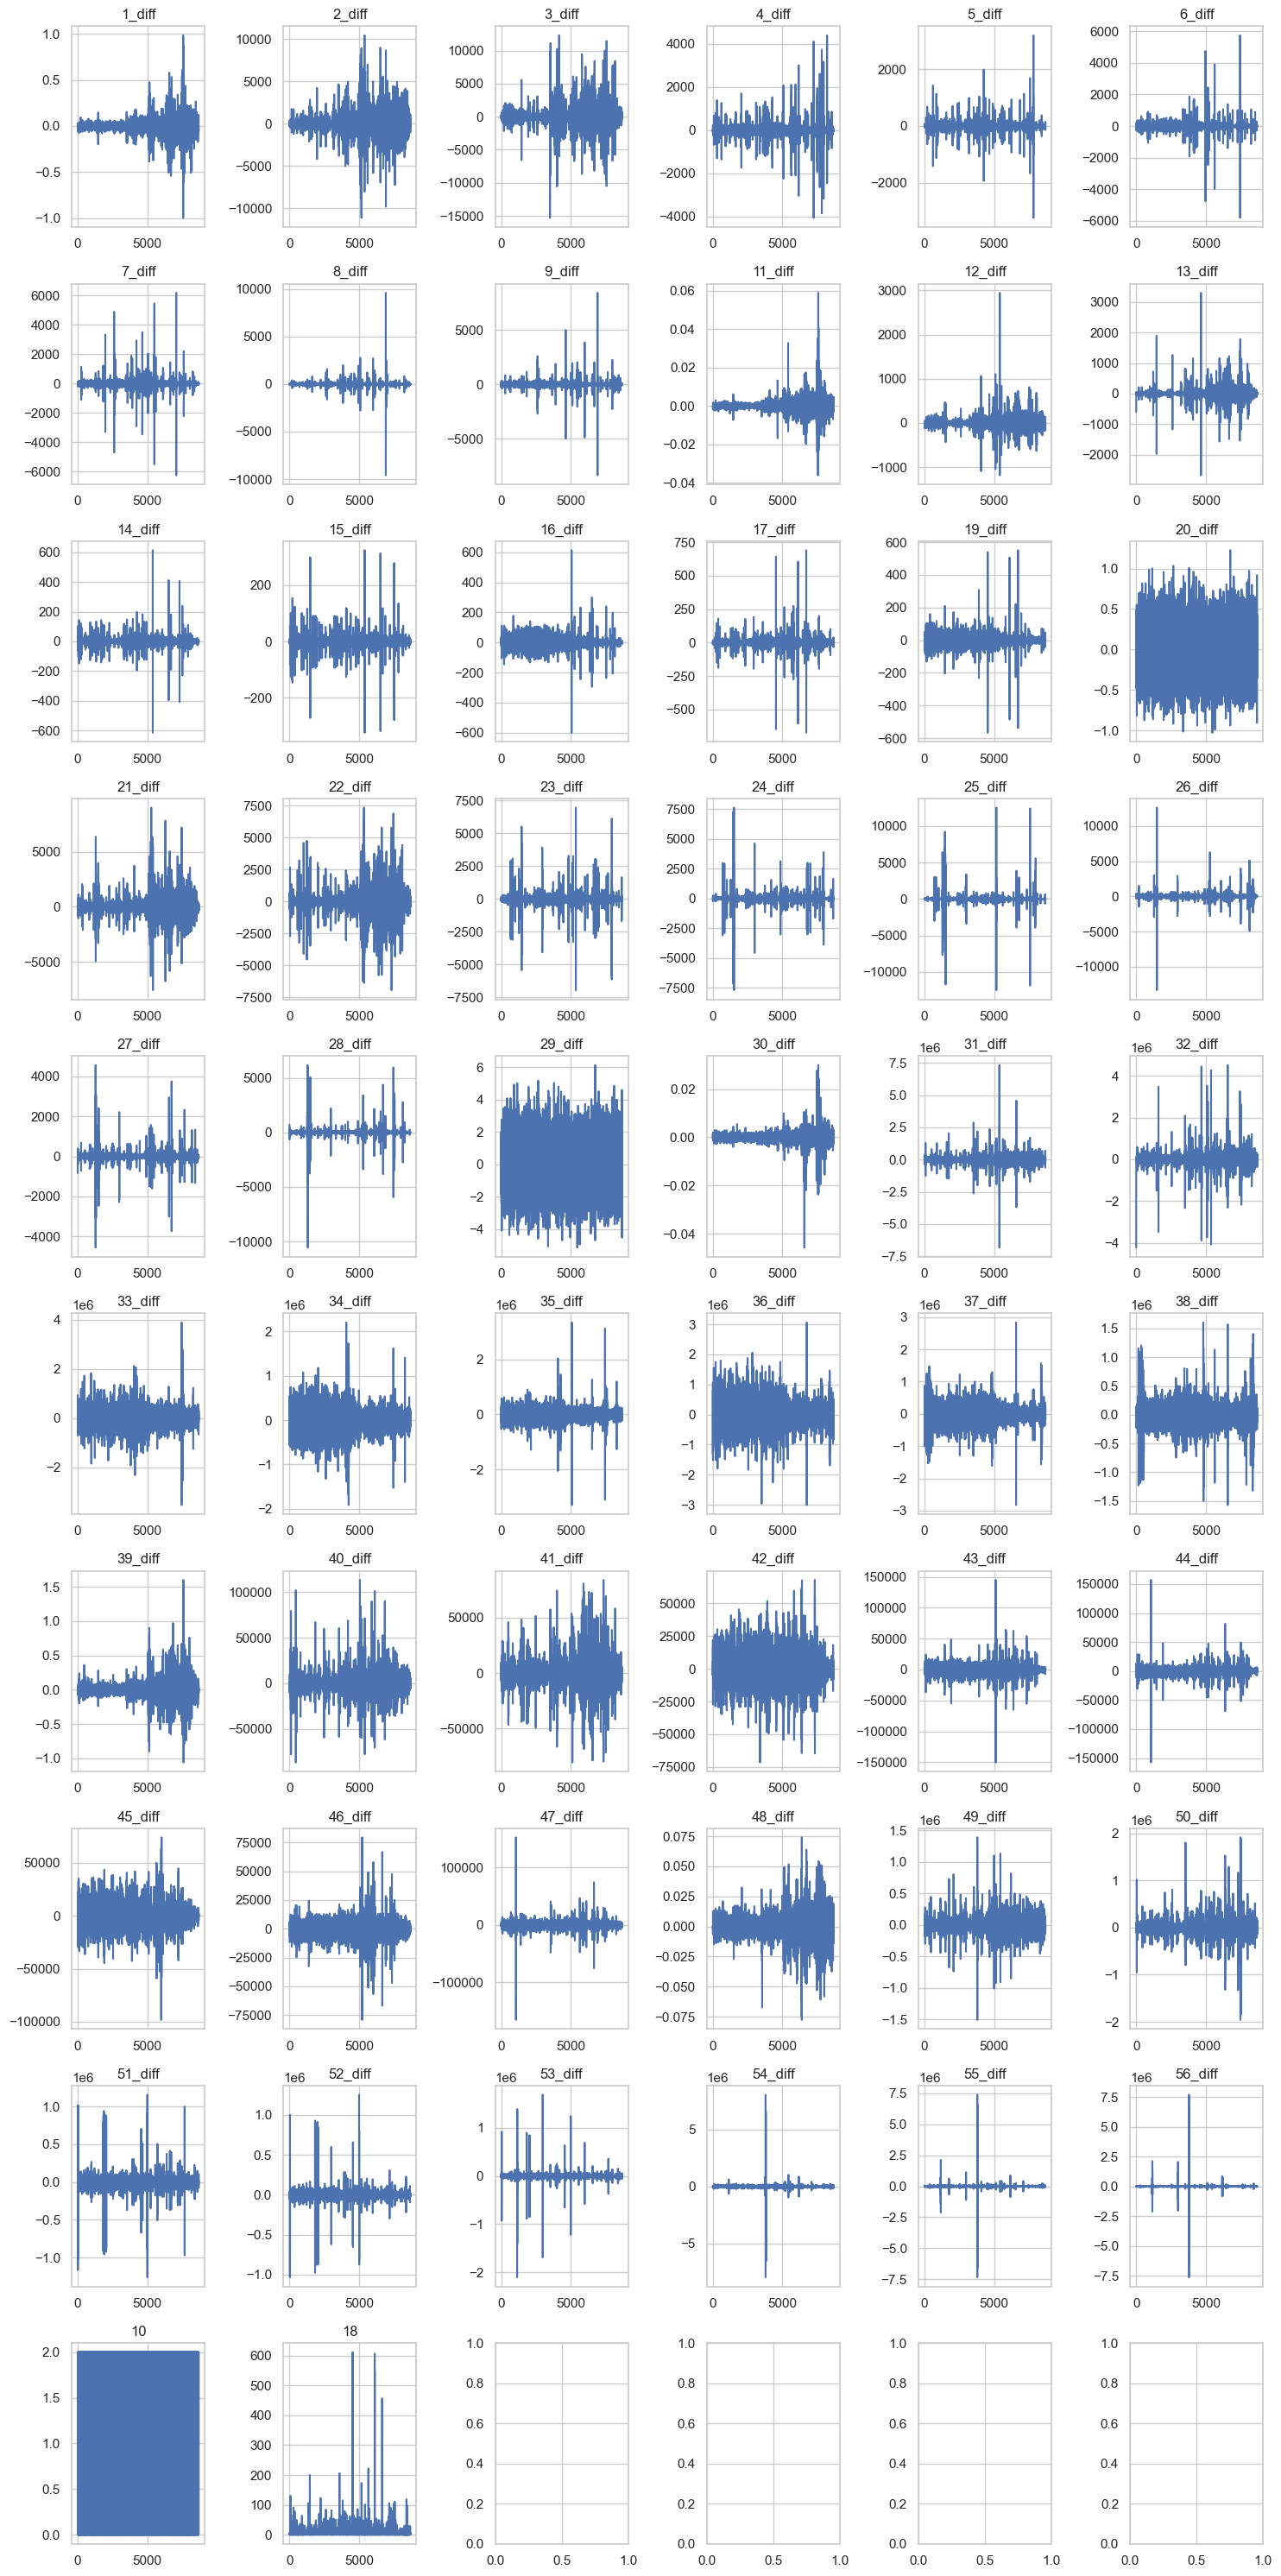

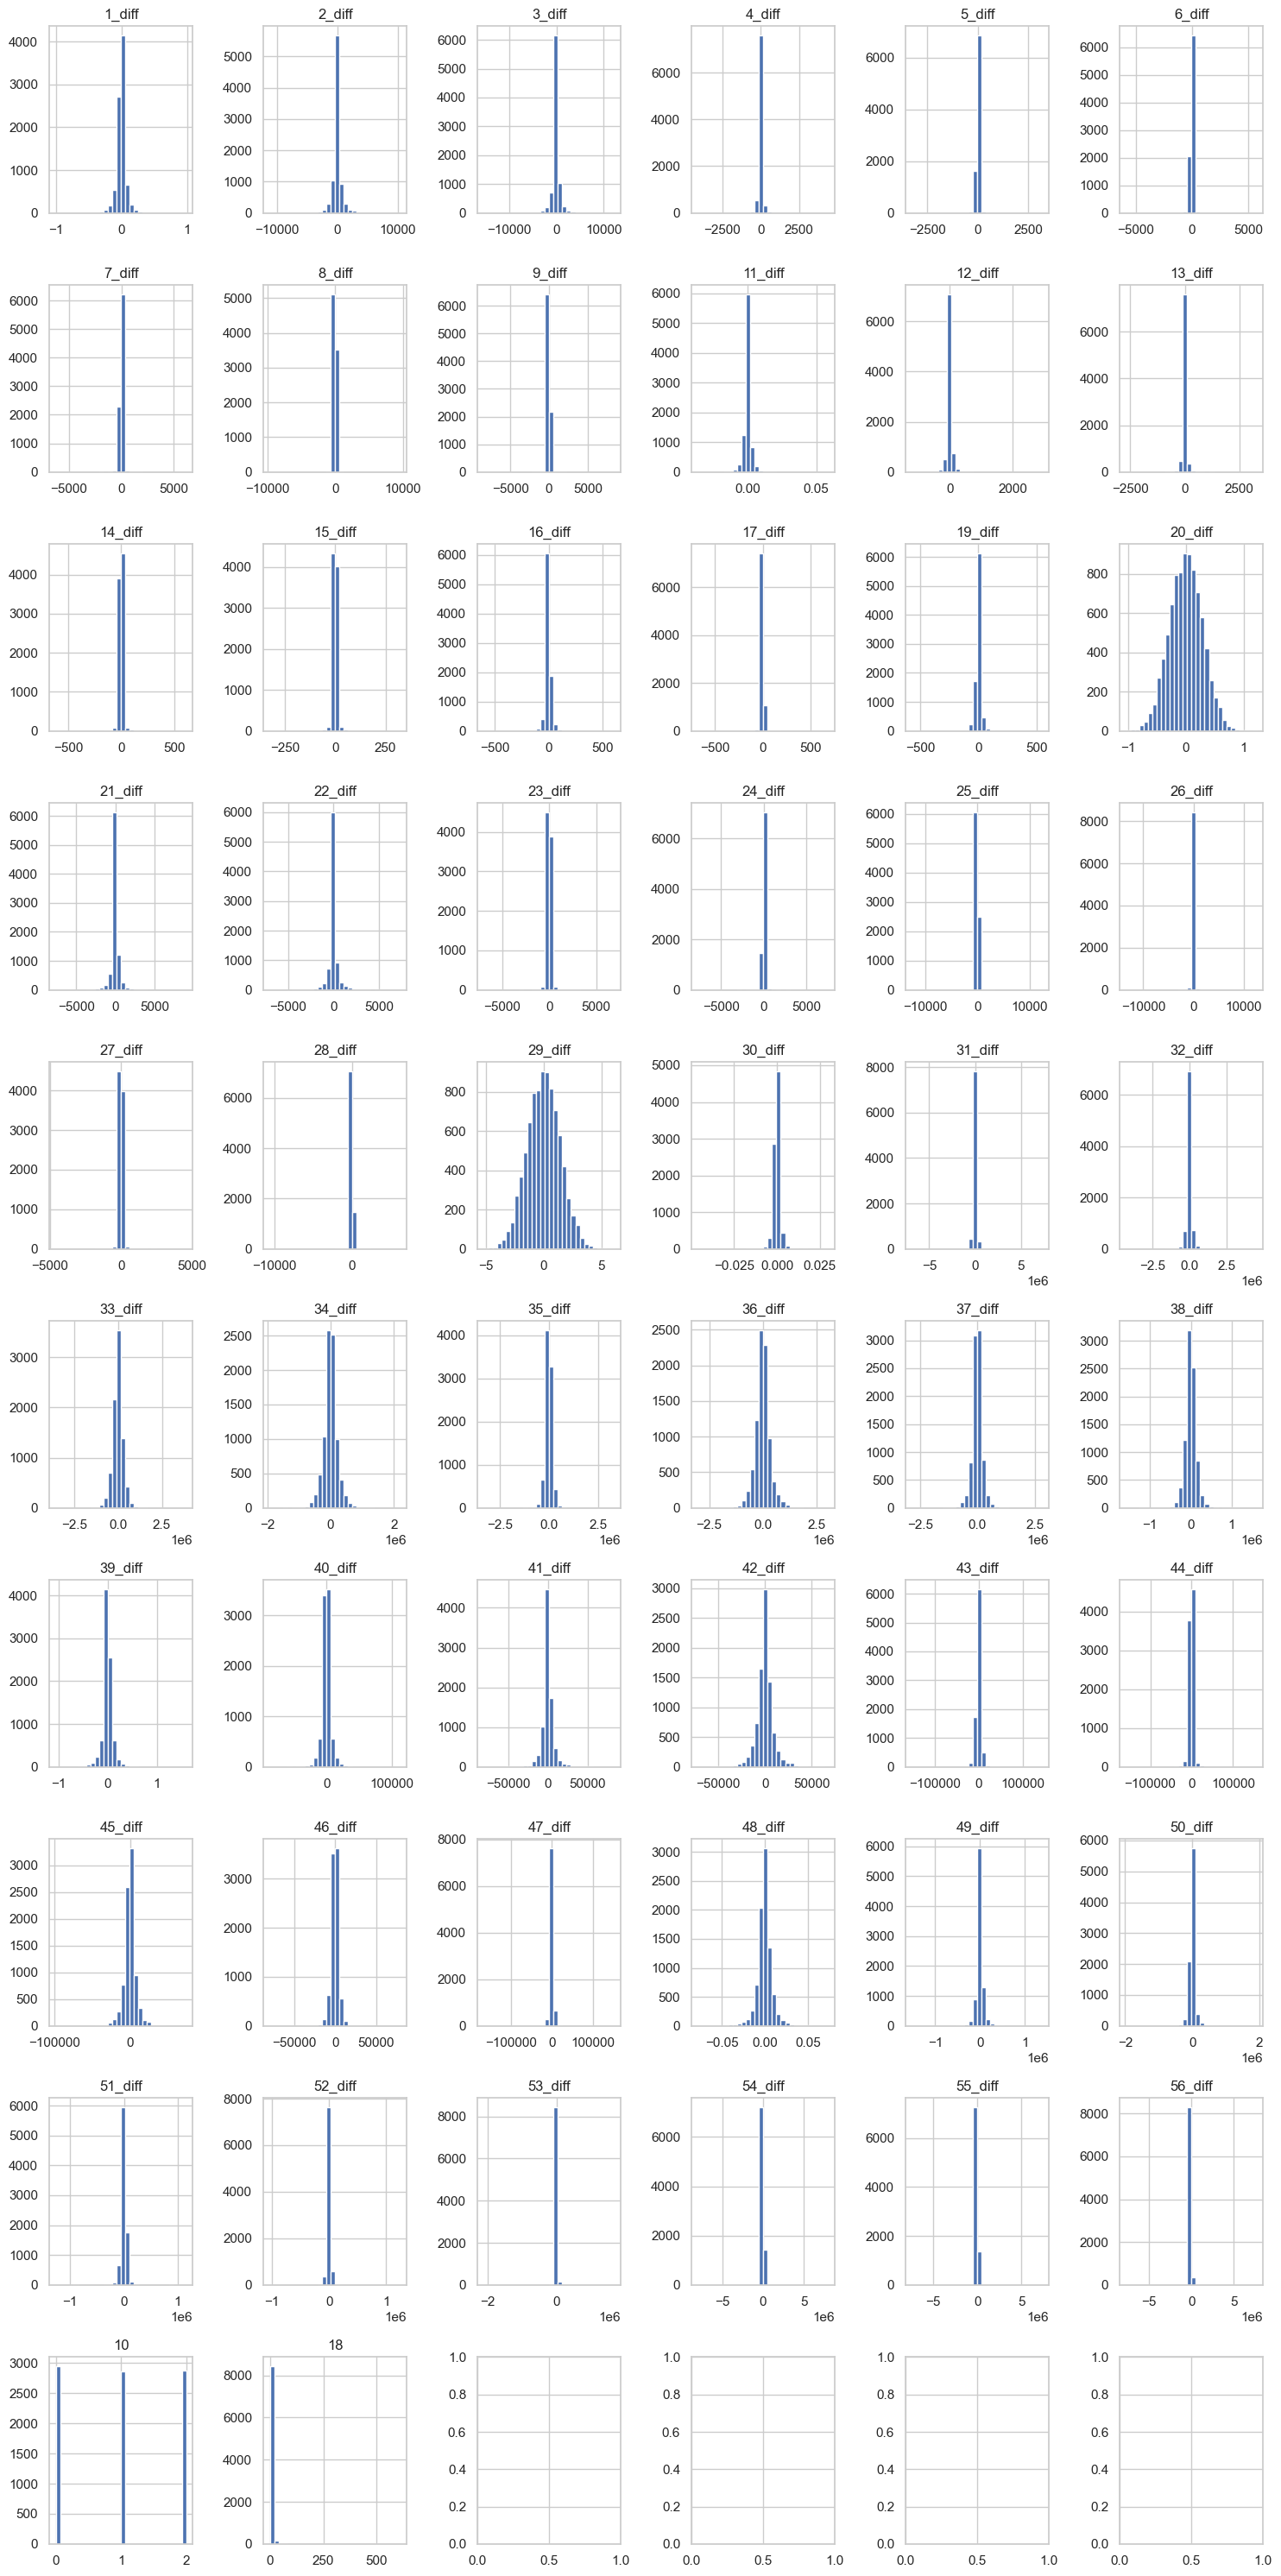

In [ ]:
# Exploratory Data Analysis, visualising data to understand patterns and relationships

# Time series plots
n_cols = 6
n_rows = int(np.ceil(len(df_diff.columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
axes = axes.flatten()
for i, col in enumerate(df_diff.columns):
    axes[i].plot(df_diff.index, df_diff[col])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

# Histogram plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
axes = axes.flatten()
for i, col in enumerate(df_diff.columns):
    axes[i].hist(df_diff[col].dropna(), bins=30)
    axes[i].set_title(col)
plt.tight_layout()
plt.show() # We see that for the differenced data, the changes are generally very small (close to 0) across time

In [71]:
# Detect using z-score since distributions look approximately normal
def detect_outliers_zscore(df, threshold=3):
    outlier_indices = {}
    for col in df.select_dtypes(include='number').columns:
        z_scores = np.abs(stats.zscore(df[col]))
        outliers = df.index[z_scores > threshold].tolist()
        outlier_indices[col] = outliers
        print(f"{col}: Found {len(outliers)} outliers")
    return outlier_indices

outliers = detect_outliers_zscore(df_diff)

1_diff: Found 187 outliers
2_diff: Found 206 outliers
3_diff: Found 192 outliers
4_diff: Found 159 outliers
5_diff: Found 123 outliers
6_diff: Found 104 outliers
7_diff: Found 104 outliers
8_diff: Found 64 outliers
9_diff: Found 71 outliers
11_diff: Found 162 outliers
12_diff: Found 167 outliers
13_diff: Found 164 outliers
14_diff: Found 116 outliers
15_diff: Found 144 outliers
16_diff: Found 161 outliers
17_diff: Found 99 outliers
19_diff: Found 89 outliers
20_diff: Found 28 outliers
21_diff: Found 195 outliers
22_diff: Found 211 outliers
23_diff: Found 134 outliers
24_diff: Found 91 outliers
25_diff: Found 107 outliers
26_diff: Found 71 outliers
27_diff: Found 95 outliers
28_diff: Found 95 outliers
29_diff: Found 28 outliers
30_diff: Found 149 outliers
31_diff: Found 102 outliers
32_diff: Found 115 outliers
33_diff: Found 113 outliers
34_diff: Found 107 outliers
35_diff: Found 82 outliers
36_diff: Found 127 outliers
37_diff: Found 147 outliers
38_diff: Found 116 outliers
39_diff: Fou

In [74]:
# Correlation Analysis
corr_matrix = df_diff.corr()

# Determine highly correlated features
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

high_corr_pairs # We see that the pairs ['1_diff', '11_diff'] and ['20_diff', '29_diff'] are highly correlated

[('11_diff', '1_diff', np.float64(0.8075508259438279)),
 ('29_diff', '20_diff', np.float64(0.9999999999999923))]

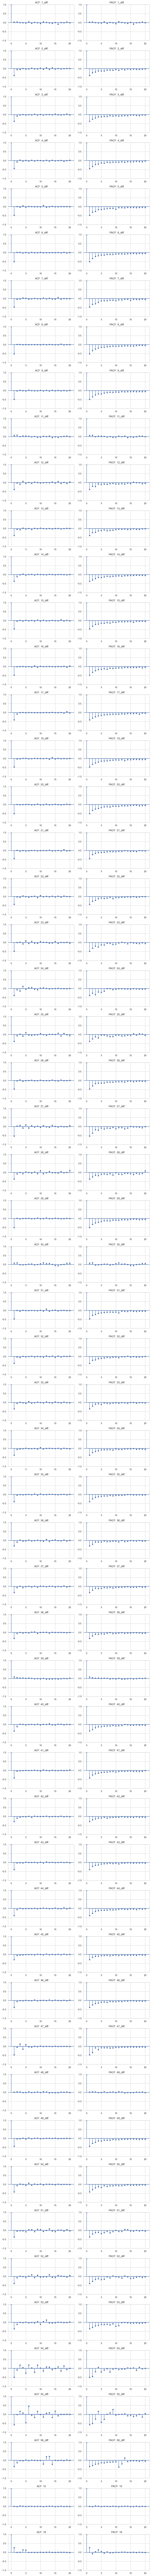

In [ ]:
features = df_diff.columns
n_features = len(features)

# Each feature needs 2 subplots (ACF, PACF side-by-side)
n_cols = 2
n_rows = n_features  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 3 * n_rows), squeeze=False)

for i, feature in enumerate(features):
    # Plot ACF
    plot_acf(df_diff[feature].dropna(), lags=20, ax=axes[i, 0])
    axes[i, 0].set_title(f'ACF: {feature}')
    # Plot PACF
    plot_pacf(df_diff[feature].dropna(), lags=20, ax=axes[i, 1], method='ywm')
    axes[i, 1].set_title(f'PACF: {feature}')

plt.tight_layout()
plt.show() # 1, 10, 11, 30, 39, 48 have no significant autocorrelations, suggesting they may be white noise.

In [ ]:
# Since 10 is categorical, it may be indicative of meaningful groupings or strong predictor of other features
df_median = df_diff.groupby('10').median()  # Median by group (to reduce impact of outliers)

# Perform Kruskal-Wallis test 
for col in df_diff.columns:
    if col in ['10']:
        continue
    groups = [group[col].dropna().values for name, group in df_diff.groupby('10')]
    stat, p = stats.kruskal(*groups)
    if p < 0.05:
        print(f"KW test for {col}: Significant differences between groups (p={p:.4f})")

# The test results indicate that '33_diff' and '38_diff' show significant differences between groups defined by '10', suggesting '10' may be a strong predictor for these features.

KW test for 33_diff: Significant differences between groups (p=0.0146)
KW test for 38_diff: Significant differences between groups (p=0.0123)
